<center>
<big>Lab D: Finding First Derivatives in Python</big><br>
https://mybinder.org/v2/gh/anniebmcc/pycalclab/master?filepath=mat301d.ipynb <br>
2020 Summer — Calculus 1<br>
Dr Matthew H Sunderland<br>
</center>

D1. _RUN the following._

In [1]:
%pylab inline
set_printoptions(precision=15)
set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


D2. **Warmup (1)−(4).**  

Let
$f(x) = \frac{x\sqrt{(x-1)^2}}{x-1} + \frac{\sqrt{x^2}}x$

(1) Find $\displaystyle\lim_{\textstyle x{\to}1^{\textstyle+}}f(x)$

In [2]:
# (1) TYPE YOUR CODE:

def f(x):
    return x*sqrt((x-1)**2)/(x-1) + sqrt(x**2)/x

x = 1 + 0.1**r_[1:10]
c_[x,f(x)]

# RECORD YOUR ANSWER: the limit is 2

array([[1.1        , 2.1        ],
       [1.01       , 2.01       ],
       [1.001      , 2.001      ],
       [1.0001     , 2.0001     ],
       [1.00001    , 2.00001    ],
       [1.000001   , 2.000001   ],
       [1.0000001  , 2.0000001  ],
       [1.00000001 , 2.00000001 ],
       [1.000000001, 2.000000001]])

(2) Find $\displaystyle\lim_{\textstyle x{\to}1^{\textstyle-}}f(x)$

In [3]:
# (2) TYPE YOUR CODE:

x = 1 - 0.1**r_[1:10]
c_[x,f(x)]

# RECORD YOUR ANSWER: the limit is 0

array([[0.9        , 0.1        ],
       [0.99       , 0.01       ],
       [0.999      , 0.001      ],
       [0.9999     , 0.0001     ],
       [0.99999    , 0.00001    ],
       [0.999999   , 0.000001   ],
       [0.9999999  , 0.0000001  ],
       [0.99999999 , 0.00000001 ],
       [0.999999999, 0.000000001]])

(3) Based on your answer to (1) and (2), find $\displaystyle\lim_{\textstyle x{\to}1}f(x)$

In [4]:
# (3) RECORD YOUR ANSWER: the limit does not exist

(4) Graph the function $f$ over $[-2,2]$. Use 10000 points.

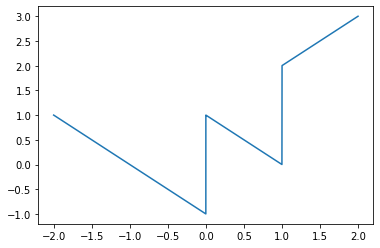

In [5]:
# (4) TYPE YOUR CODE:

x = linspace(-2,2,10000)
plot(x,f(x))

## Computing the derivative at a point using the limit definition of derivative

D3. <a id='D3'></a>EXAMPLE. Let us approximate
$\frac d{dx} x^x\big|_{\,0.6}$
to 4 decimal places.

In lecture we learned that limit definition of derivative is
$f'(x) := \lim\limits_{h\to0} \frac{f(x+h)-f(x)}h$

_RUN the following._

In [6]:
def f(x): return x**x

x = 0.6
h = 0.1 ** r_[:15]  # = array of numbers going to 0
m = (f(x+h)-f(x))/h
c_[h,m]             # make a table

array([[1.               , 1.385228648279758],
       [0.1              , 0.430339898526158],
       [0.01             , 0.367055009340134],
       [0.001            , 0.360744452604034],
       [0.0001           , 0.360113206078205],
       [0.00001          , 0.360050079117879],
       [0.000001         , 0.360043766467477],
       [0.0000001        , 0.360043135305688],
       [0.00000001       , 0.360043073133198],
       [0.000000001      , 0.360043106439889],
       [0.0000000001     , 0.360043106439889],
       [0.00000000001    , 0.360045326885938],
       [0.000000000001   , 0.360045326885938],
       [0.0000000000001  , 0.35971225997855 ],
       [0.00000000000001 , 0.35527136788005 ]])

$\implies$ The limit to 4 decimal places is $\boxed{0.3600}$

D4. ASSIDE.
Later on in calculus you will learn how to compute $\frac d{dx} x^x\big|_{\,0.6}$ algebraically.
It turns out that

$\qquad (x^x)' = (e^{x\ln x})' = e^{x\ln x}(\ln x + x/x) = x^x(\ln x + 1)$

and so $(x^x)'(0.6) = 0.6^{0.6}(\ln0.6 + 1)$.

_RUN the following_

In [7]:
0.6**0.6*(log(0.6) + 1)

0.3600430649889697

So we see that $(x^x)'(0.6) = 0.6^{0.6}(\ln0.6 + 1) = 0.3600430649889697$, which confirms our approximation in D3.

D5. <a id='D5'></a>**EXERCISE.** Approximate
$\frac d{dx}\big(\sin x\big)\,\bigg|_{\textstyle\,x = \pi/4}$
to 4 decimal places.

In [8]:
# TYPE YOUR CODE:

def f(x): return sin(x)

x = pi/4
h = 0.1 ** r_[:15]
m = (f(x+h)-f(x))/h
c_[h,m]

# RECORD YOUR ANSWER:
# the limit to 4 decimal places is 0.7071

array([[1.               , 0.269954482712928],
       [0.1              , 0.67060297290399 ],
       [0.01             , 0.70355949168921 ],
       [0.001            , 0.706753109974256],
       [0.0001           , 0.707071424668193],
       [0.00001          , 0.707103245645157],
       [0.000001         , 0.707106427633164],
       [0.0000001        , 0.707106745378993],
       [0.00000001       , 0.707106773134569],
       [0.000000001      , 0.70710681754349 ],
       [0.0000000001     , 0.707106595498885],
       [0.00000000001    , 0.707101044383762],
       [0.000000000001   , 0.707101044383762],
       [0.0000000000001  , 0.708322289710849],
       [0.00000000000001 , 0.7105427357601  ]])

## Secant and tangent lines

The fraction inside the limit in the limit definition of derivative is called the "difference quotient"

$\qquad$ difference quotient = $\displaystyle\frac{f(x+h)-f(x)}h$

The difference quotient is the slope of the secant line though the graph at $x$ and $x+h$.

D6. EXAMPLE. Consider the same function as in [D3](#D3), $f(x)=x^x$.
Let's plot $f$ over $[0,2]$ and then plot the secant line for $h = 1, 0.1, 0.01$.

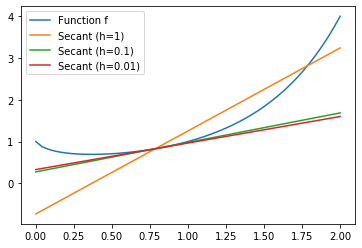

In [9]:
def f(x): return x**x

x = linspace(0,2)
plot(x,f(x))

x0 = pi/4

for h in [1, 0.1, 0.01]:
    m = (f(x0+h) - f(x0))/h
    y = f(x0) + m*(x-x0)
    plot(x,y)

legend(['Function f', 'Secant (h=1)', 'Secant (h=0.1)', 'Secant (h=0.01)']);

We actually have already computed the slope of these 3 secant lines in [D3](#D3)!  
Their slopes are:  
$\quad$ 1.385228648279758,  
$\quad$ 0.430339898526158, and  
$\quad$ 0.367055009340134.

As $h$ approaches 0, the secant lines approach the tangent line,
and the difference quotient (the slope of the secant line) approaches the derivative (the slope of the tangent line).

D7. **EXERCISE (1)−(2).** Consider the same function as in [D5](#D5), $f(x)=\sin x$.  
(1) Plot $f$ over $[0,\pi]$.
and then plot the secant line for $h = \pi/2, 1, 0.1$.  
(2) What is the slope of the three secant lines?
Hint: look at the table you made in [D5](#D5).

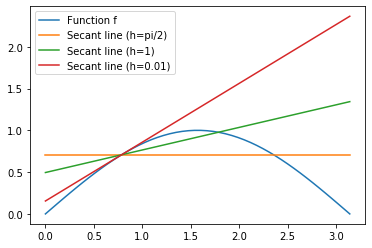

In [10]:
# (1) TYPE YOUR CODE:

def f(x): return sin(x)

x = linspace(0,pi)
plot(x,f(x))

x0 = pi/4

for h in [pi/2, 1, 0.01]:
    m = (f(x0+h) - f(x0))/h
    y = f(x0) + m*(x-x0)
    plot(x,y)

legend([
    'Function f',
    'Secant line (h=pi/2)',
    'Secant line (h=1)',
    'Secant line (h=0.01)',
]);

# (2) RECORD YOUR ANSWER:
#     the slope of the 3 secant lines are
#     0,
#     0.269954482712928,
#     0.67060297290399

## Graphing the difference quotient

D8. EXAMPLE. Consider the same function as in [D3](#D3), $f(x)=x^x$.

Let's graph over the interval $[0,2]$ the difference quotient for $h=1, 0.1, 0.01, 0.001$.

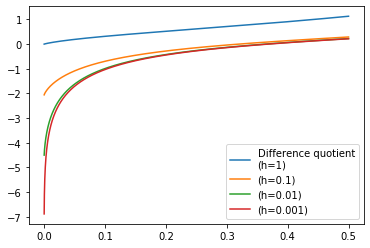

In [11]:
def f(x): return x**x

x = linspace(0,0.5,10000)

for h in [1, 0.1, 0.01, 0.001]:
    m = (f(x+h) - f(x))/h
    plot(x,m)

legend([
    'Difference quotient\n(h=1)',
    '(h=0.1)',
    '(h=0.01)',
    '(h=0.001)',
]);

The graph of the difference quotient approaches the graph of the derivative function $f'$.
For $h$ very close to zero, the difference quotient approximates the derivative.

D9. **EXERCISE (1)−(4).** Consider the same function as in [D5](#D5), $f(x)=\sin x$.

(1) Plot $f$ over $[0,2\pi]$. Add a grid.
(2) Plot the difference quotient for $h = 1, 0.5, 0.25, 0.125$.

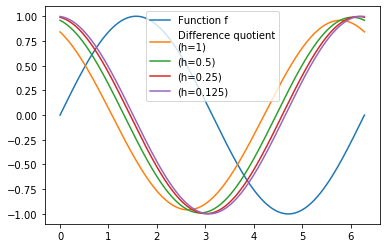

In [12]:
# (1) TYPE YOUR CODE:

def f(x): return sin(x)

x = linspace(0,2*pi,10000)
plot(x,f(x))
grid();


# (2) TYPE YOUR CODE:

for h in [1, 0.5, 0.25, 0.125]:
    m = (f(x+h) - f(x))/h
    plot(x,m)

grid()

legend([
    'Function f',
    'Difference quotient\n(h=1)',
    '(h=0.5)',
    '(h=0.25)',
    '(h=0.125)',
]);

(3) What function do the difference quotients appear to approach?

In [13]:
# (3) RECORD YOUR ANSWER: cos(x)

(4) Fill-in-the-blank: At the roots of the difference quotients, the original function $f$ has $\underline\qquad$.

In [14]:
# (4) RECORD YOUR ANSWER:
#     At the roots of the difference quotients,
#     the original function f has ZERO SLOPE
#           (also acceptable answer: RELATIVE EXTREMA)

D10. **EXERCISE (1)−(5).**

(1) Let $f(x) = e^x$. Graph $f$ over $[-2,2]$ and also graph the difference quotient for $h=0.01$. The difference quotient for small $h$ is approximately the derivative.  
(2) TRUE/FALSE. Since $f$ is always increasing, $f'>0$  
(3) TRUE/FALSE. Tangent lines for $f$ are never flat, so $f$ has no critical points.  
(4) TRUE/FALSE. Since $f$ increases faster and faster, $f'$ should be increasing.  
(5) Take a guess as to what the derivative of $f(x) = e^x$ is.

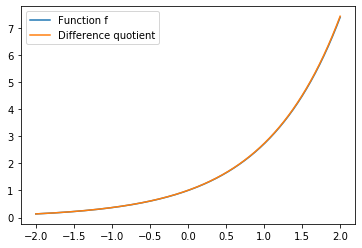

In [15]:
# (1) TYPE YOUR CODE:

def f(x): return exp(x)

x = linspace(-2,2,10000)
plot(x,f(x))

h = 0.01
m = (f(x+h) - f(x))/h
plot(x,m)

legend(['Function f','Difference quotient']);

# (2) RECORD YOUR ANSWER: true
# (3) RECORD YOUR ANSWER: true
# (4) RECORD YOUR ANSWER: true
# (5) RECORD YOUR ANSWER: e^x

## Differentiability

D11. EXAMPLE. In lecture we learned that corners and cusps mean "continuous but not differentiable."
Let's look at a function that has a cusp at 0.

Plot $f(x) = x^{2/3}$ over $[-2,2]$, and also plot the difference quotient for $h = 1, 0.5, 0.25, 0.125$.

(Numpy does not like taking the cube root of negative numbers, so we will graph $(x^2)^{1/3}$ which is equivalent to $x^{2/3}$.)

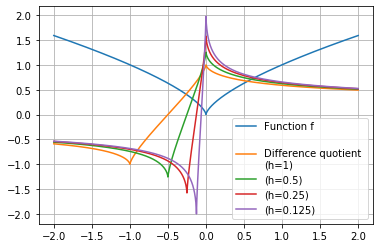

In [16]:
def f(x): return (x**2)**(1/3)

x = linspace(-2,2,10000)
plot(x,f(x))

for h in [1, 0.5, 0.25, 0.125]:
    m = (f(x+h) - f(x))/h
    plot(x,m)

grid()

legend([
    'Function f',
    '\nDifference quotient \n(h=1)',
    '(h=0.5)',
    '(h=0.25)',
    '(h=0.125)',
]);

The graph of the difference quotient approaches the graph of the derivative of $x^{2/3}$, which is $(2/3)x^{-1/3}$.
Since $f$ has a cusp at 0, the derivative has an asymptote at 0.

D12. **EXERCISE (1)−(2).**  
(1) Plot $f(x) = |x|$ over $[-2,2]$, and also plot the difference quotient for $h = 1, 0.5, 0.25, 0.125$.  
(2) Fill in the blank: Since $f$ has a corner at 0, thus $f'$ has a $\underline\qquad$ at 0.

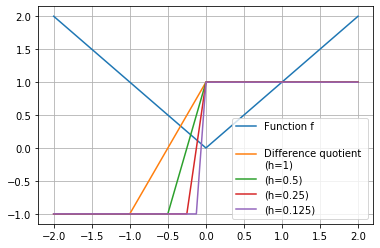

In [17]:
# (1) TYPE YOUR CODE:

def f(x): return abs(x)

x = linspace(-2,2,10000)
plot(x,f(x))

for h in [1, 0.5, 0.25, 0.125]:
    m = (f(x+h) - f(x))/h
    plot(x,m)

grid()

legend([
    'Function f',
    '\nDifference quotient \n(h=1)',
    '(h=0.5)',
    '(h=0.25)',
    '(h=0.125)',
]);

# (2) RECORD YOUR ANSWER:
#     Since f has a corner at 0,
#     thus f' has a jump at 0.